In [9]:
import numpy as np
import pandas as pd
import seaborn as sns

import glob
import os
import pathlib

import matplotlib.pyplot as plt
from textwrap import wrap
from matplotlib.patches import Patch

#mycol = ["red", "darkorange", "yellow", "limegreen", "dodgerblue", "darkviolet", "deeppink" ]
mycol = ["red", "green", "blue"]

import warnings
warnings.filterwarnings("ignore")

import colorsys
from PIL import ImageColor

In [10]:
# Create dummy scatter plots using various marker types
# The multiple overlaid datasets are distringuished not only by colour but also by shape
# We prepare custom marker shapes (e.g. circles, triangles, +) from scatter plot artists in matplotlib, then apply those markers to a new plot

fig, ax = plt.subplots(1,1)
a = ax.scatter([1,2],[3,4], marker='o')
b = ax.scatter([1,2],[2,4], marker='X')
c = ax.scatter([1,5],[3,4], marker='+')
d = ax.scatter([2,2],[3,4], marker='v')
e = ax.scatter([3,2],[3,4], marker='^')
f = ax.scatter([3,2],[4,4], marker='<')
g = ax.scatter([1,2],[1,4], marker='>')
h = ax.scatter([1,2],[2,4], marker='.')
i = ax.scatter([1,2],[3,4], marker=',')
j = ax.scatter([0,0],[5,4], marker='1')
k = ax.scatter([0,1],[0,3], marker='2')
l = ax.scatter([0,2],[1,4], marker='8')
# ['.', ',', 'o', 'v', '^', '<', '>', '1', '2', '3', '4', '8', 's', 'p', '*', 'h', 'H', '+', 'x', 'D', 'd', '|', '_', 'P', 'X',

square_mk, = a.get_paths()
triangle_up_mk, = b.get_paths()
plus_mk, = c.get_paths()
v_mk, = d.get_paths()
up_mk, = e.get_paths()
left_mk, = f.get_paths()
right_mk, = g.get_paths()
dot_mk, = h.get_paths()
comma_mk, = i.get_paths()
one_mk, = j.get_paths()
two_mk, = k.get_paths()
three_mk, = l.get_paths()
plt.close()

def apply_markers(ax):
    """
    Assign custom marker shapes to each colour group in a matplotlib Axes object.

    Parameters:
    ----------
    ax : matplotlib.axes.Axes
        The Axes object containing scatter plot collections where each colour group
        will be assigned a unique marker path.

    Notes:
    -----
    - The marker shapes used are predefined and mapped to colours based on order.
    - This function assumes that the number of unique colours does not exceed
      the number of predefined markers.
    - Useful for making scatter plots more accessible or visually distinct beyond colour.
    """
    collections = ax.collections
    unique_colors = np.unique(collections[0].get_facecolors(), axis=0)
    markers = [triangle_up_mk, square_mk, plus_mk, v_mk, up_mk, left_mk, right_mk, dot_mk, comma_mk, one_mk, two_mk, three_mk]  # this array must be at least as large as the number of unique colors
    for collection in collections:
        paths = []
        for current_color in collection.get_facecolors():
            for possible_marker,possible_color in zip(markers, unique_colors):
                if np.array_equal(current_color,possible_color):
                    paths.append(possible_marker)
                    break
        collection.set_paths(paths)

In [11]:
def plot_acinar_differences(data, parameter,color="k", spacing = 0.2, figsize=(5,6)):
    """
    Plot acinar parameter differences across conditions and timepoints using split-panel swarm + box plots.
    Because the conditions are different at each time point (blank only d0, soft/stiff on subsequent days) we use a multi panel graph

    Parameters:
    ----------
    data : pd.DataFrame
        A long-form DataFrame containing:
        - 'day' (int): timepoint
        - 'condition' (str): e.g., "soft", "stiff"
        - 'Key_index' (str/int): group or replicate identifier
        - [parameter] (float): value to be plotted on the y-axis
    parameter : str
        Name of the parameter column to plot (y-axis).
    color : str, default='k'
        Colour of boxplot whiskers, caps, and medians (default: black).
    spacing : float, default=0.2
        Horizontal spacing between paired condition subplots.
    figsize : tuple, default=(5, 6)
        Size of the matplotlib figure.

    Returns:
    -------
    None
        Saves the figure as a PDF named "Acinar<parameter>.pdf".

    Notes:
    -----
    - Timepoint 0 is plotted alone (assumed to be blank/control).
    - Other days are plotted as paired conditions ("soft", "stiff").
    - Uses colour-coded swarmplots (red, limegreen, dodgerblue) and boxplots with transparent fill.
    - Legends and markers are manually applied for clarity.
    """
    day_axis_dict ={0:0, 1:2, 3:5, 7:8}
    properties = dict(color=color)
    width_ratios=[1.5,spacing,1.5,1,spacing,1.5,1,spacing,1.5,1]
    gridspec = dict(hspace=0.0, wspace=0.01, width_ratios=width_ratios)
    fig, ax = plt.subplots(nrows = 1, ncols = len(width_ratios), figsize=figsize, gridspec_kw = gridspec)
    days = data["day"].unique()
    days.sort()

    for i, day in enumerate(data["day"].unique()):
        if day == 0:
            sns.swarmplot(data = data[data["day"]==day],  y=parameter, hue="Key_index", palette =palette_14_red, x="day",legend=None, ax = ax[0], size=5, alpha=1)
            sns.boxplot(data = data[data["day"]==day],  y=parameter, palette = "hsv", x="day", boxprops={'facecolor':'None', "edgecolor":"None"}, whiskerprops = properties, capprops = properties, medianprops = properties, ax = ax[0], whis=0, fliersize=0, zorder=100)

        if day != 0:
            sns.swarmplot(data = data[(data["condition"]=="soft") & (data["day"]==day)],  y=parameter, x="day", hue="Key_index", legend=None,  palette = palette_14_limegreen,  ax = ax[day_axis_dict[day]], size=5, alpha=1)
            sns.boxplot(data = data[(data["condition"]=="soft") & (data["day"]==day)],  y=parameter, x="day", palette = "hsv", boxprops={'facecolor':'None', "edgecolor":"None"}, whiskerprops = properties, capprops = properties, medianprops = properties, ax = ax[day_axis_dict[day]], whis=0, fliersize=0,zorder=100)
            
            sns.swarmplot(data = data[(data["condition"]=="stiff") & (data["day"]==day)],  y=parameter, x="day",hue="Key_index",  legend = None, palette = palette_14_dodgerblue, ax = ax[day_axis_dict[day]+1], size=5, alpha=1)
            sns.boxplot(data = data[(data["condition"]=="stiff") & (data["day"]==day)],  y=parameter, x="day",palette = "hsv", boxprops={'facecolor':'None', "edgecolor":"None"}, whiskerprops = properties, capprops = properties, medianprops = properties, ax = ax[day_axis_dict[day]+1], whis=0, fliersize=0,zorder=100)

    for i, a in enumerate(ax):
        a.set_xlabel("")
        a.set_ylim(0.95*data[parameter].min(), 1.05*data[parameter].max())
        if i != 0 and i != len(ax)-1:
            a.spines["left"].set_visible(False)
            a.spines["right"].set_visible(False)
            a.yaxis.set_visible(False)
        if i == 0:
            a.spines["right"].set_visible(False)
        if i == len(ax)-1:
            a.spines["left"].set_visible(False)
            a.yaxis.set_visible(False)
        
    fig.text(0.5, 0.04, 'Day', va='center', ha='center', fontsize=14)

    legend_elements = [Patch(facecolor="red", edgecolor="black",  label='Blank'),
                        Patch(facecolor="limegreen", edgecolor="black",  label='Soft'),
                        Patch(facecolor="dodgerblue", edgecolor="black",  label='Stiff')]
                    
    lgd = plt.legend(bbox_to_anchor=(1.01, 1), loc='upper left', handles=legend_elements, framealpha=0)
    ax[0].set_ylabel (ax[0].yaxis.get_label().get_text().replace("_", " "), fontsize=14)

    for i in ([0,2,3,5,6, 8, 9]):
        if i <= 3*len(days)-3:
            apply_markers(ax[i])
    for i in [1,3,4,6,7,9]:
        if i <= 3*len(days)-3:
            ax[i].set_xticks([])
    for i,j in enumerate([2,5,8]):
        if j < len(width_ratios)-1:
            ax[j].set_xticks([1], labels = days[i+1].astype(str))
    #plt.savefig("Acinar{}.pdf".format(parameter), transparent = True, bbox_inches = "tight")

In [12]:
def protein_set(row):
    """
    Determine the protein set imaged in a microscopy file based on keywords in the filename.

    Parameters:
    ----------
    row : pd.Series
        A row from a DataFrame, expected to contain a 'filename' field (string) with relevant protein markers.

    Returns:
    -------
    str
        A string representing the protein set identified from the filename. One of:
        - 'ECad_C3'
        - 'Yap_Vinc'
        - 'Ilk'
        - 'Lam_Pax'
        - 'Talin_pFak'
        - 'Col_Beta_Cat'
        - 'Misp_Alpha_Cat'
        - 'other' (if none of the above patterns match)

    Notes:
    -----
    - Matching is case-insensitive.
    - Each condition checks for co-occurrence of specific protein name fragments in the filename.
    - Used to categorize images for grouped analysis or filtering.
    """
    if "ecad" in row['filename'].lower() and  "c3" in row['filename'].lower():
        return 'ECad_C3'
    elif "yap" in row['filename'].lower() and  "vinc" in row['filename'].lower():
        return 'Yap_Vinc'
    elif "ilk" in row['filename'].lower() :
      return 'Ilk'
    elif "lam" in row['filename'].lower() and  "pax" in row['filename'].lower():
      return 'Lam_Pax'
    elif "fak" in row['filename'].lower() and  "talin" in row['filename'].lower():
      return 'Talin_pFak'
    elif "col" in row['filename'].lower() and  "beta" in row['filename'].lower():
      return"Col_Beta_Cat"
    elif "misp" in row['filename'].lower():
       return "Misp_Alpha_Cat"
    else:
      return "other"

In [13]:
def create_n_valued_palette(base_color_hex, n=14):
    """
    Generate a palette of `n` RGB colours by varying the lightness of a base colour.

    Parameters:
    ----------
    base_colour_hex : str
        Base colour in hexadecimal format (e.g., "#1E90FF") to derive the palette from.
    n : int, default=14
        Number of distinct colours to generate.

    Returns:
    -------
    palette : list of tuples
        A list of `n` RGB colour tuples (with values between 0 and 1).
        The colours vary in lightness while maintaining the base hue and saturation.

    Notes:
    -----
    - Lightness is scaled between 60% and 140% of the original value, clipped to [0, 1]. Can increase the range for greater contrast
    - Useful for generating visually related colours with consistent tone and hue.
    """
    r,g,b = ImageColor.getcolor(base_color_hex, "RGB")[0], ImageColor.getcolor(base_color_hex, "RGB")[1], ImageColor.getcolor(base_color_hex, "RGB")[2]
    r=r/255
    g=g/255
    b=b/255
    h, l, s = colorsys.rgb_to_hls(r, g, b)
    lightness_adjustments = np.linspace(0.6, 1.4, n)  # Creating a range of values
    # Create the palette with adjusted lightness while keeping hue and saturation constant
    palette = [colorsys.hls_to_rgb(h, min(max(l * adj, 0), 1), s) for adj in lightness_adjustments]

    return palette

In [14]:
root= "C:\\Users\\itayl\\The University of Manchester Dropbox\\Isobel Taylor-Hearn\\Python\\Soft_Stiff_Experiment\\Shape_Size_Cells_Acini\\Shape_Size_Acini\\final_outputs\\inividual_outputs\\using"
csv_paths = list(pathlib.Path(root).glob("*.csv"))
print(len(csv_paths))
data = []
for i in range(len(csv_paths)):
    data.append(pd.read_csv(csv_paths[i]))
all_data = pd.concat(data)
# all_data.to_csv("all_acinus_volumes_01_05.csv")
# all_data = pd.read_csv("all_acinus_volumes_01_05.csv")

5


In [15]:
all_data["Protein_Set"]=all_data.apply(protein_set, axis=1)
all_data["Key"] = all_data["Protein_Set"].astype(str) + ", well" + all_data["well"].astype(str)
len(all_data["Key"].unique())
all_data.to_csv("all_acinus_volumes_01_05.csv")   
all_data["Key_index"] = all_data.Key.map(dict(zip(all_data.Key.unique(), range(all_data.Key.nunique()))))

In [16]:
# Creating the 14-valued palette
palette_14_limegreen = create_n_valued_palette("#32CD32")
palette_14_dodgerblue = create_n_valued_palette("#1E90FF")
palette_14_red = create_n_valued_palette("#FF0000")

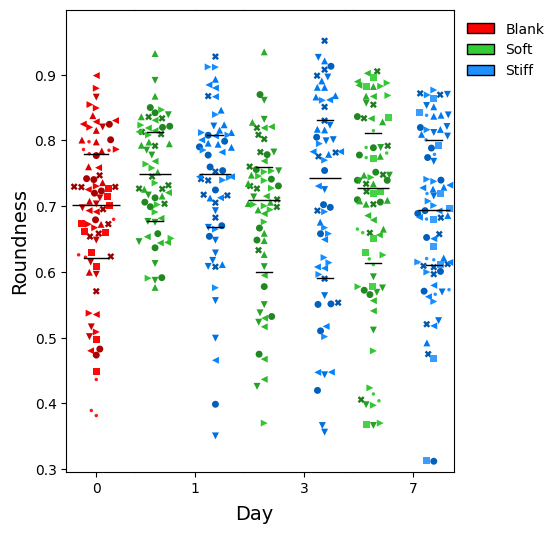

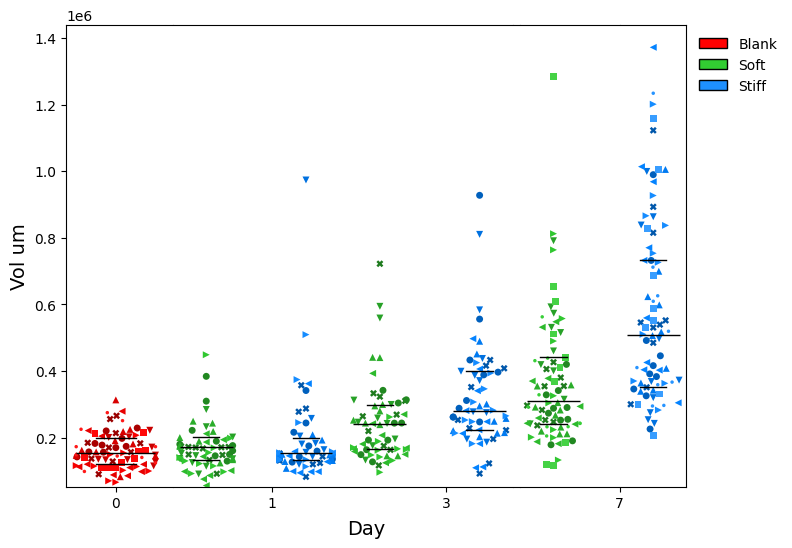

In [17]:
plot_acinar_differences(all_data[all_data["Key"]!="Lam_Pax, well1"], "Roundness")
plot_acinar_differences(all_data[all_data["Key"]!="Lam_Pax, well1"], "Vol_um", figsize=(8,6), spacing=0.1)

In [18]:
all_data["mean_roundness"] = all_data.groupby(["Key", "day", "condition"], as_index=False).Roundness.transform('mean')
all_data["mean_volume"] = all_data.groupby(["Key", "day", "condition"], as_index = False).Vol_um.transform("mean")
all_data = all_data[all_data["Key"]!="Lam_Pax, well1"]
plotting = all_data[["Key", "day", "mean_roundness", "mean_volume", "condition"]]
plotting = plotting.drop_duplicates(subset='mean_roundness')

<Axes: xlabel='day', ylabel='mean_roundness'>

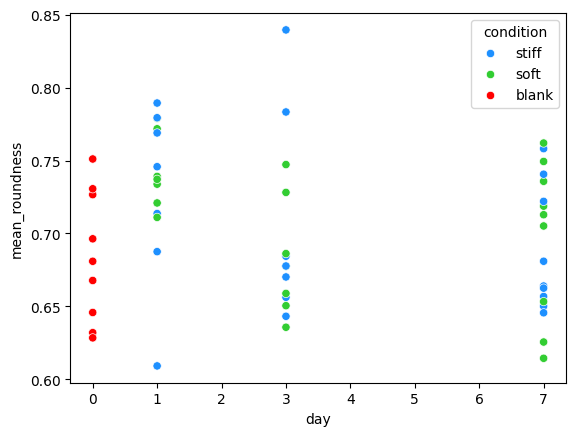

In [19]:
sns.scatterplot(data = plotting, x="day", y="mean_roundness", hue="condition", palette = ["dodgerblue", "limegreen", "red"])

<Axes: xlabel='day', ylabel='mean_volume'>

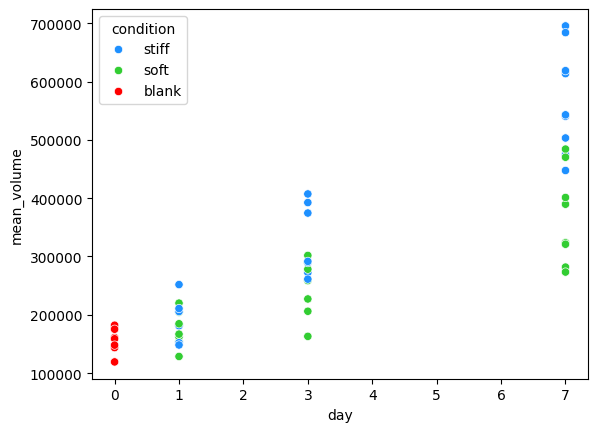

In [20]:
sns.scatterplot(data = plotting, x="day", y="mean_volume", hue="condition", palette = ["dodgerblue", "limegreen", "red"])